<a href="https://colab.research.google.com/github/raghunandepu/Tensorflow2.0_practice/blob/master/2_Develop_a_Model_to_Predict_Ice_Cream_Sales_Using_Temperature_RN_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT


- You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decided to build a simple Artificial Neural Network to solve this problem.  

- Data set:
  - Input (X): Outside Air Temperature
  - Output (Y): Overall daily revenue generated in dollars 

- This example is a regression example, we will cover regression in more details in future projects. 


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg"
          width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Predict Ice Cream Sales [Source: https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg]
  </td></tr>
</table>


# STEP #0: IMPORT LIBRARIES

In [4]:
!pip install tensorflow-gpu==2.0.0.alpha0

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [6]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# import CSV file entitled "SalesData.csv"
data_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/SalesData.csv")

In [8]:
data_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [10]:
data_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# STEP #2: VISUALIZE DATASET

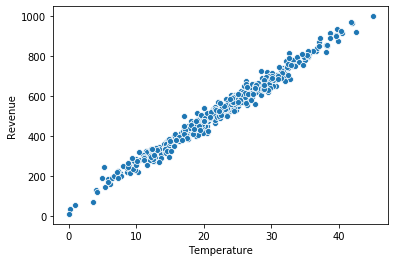

In [11]:
sns.scatterplot(data_df['Temperature'], data_df['Revenue'])

# STEP #3: CREATE TESTING AND TRAINING DATASET

In [0]:
X_train = data_df['Temperature']
y_train = data_df['Revenue']

# STEP#4: BUILD AND TRAIN THE MODEL

In [13]:
X_train.shape

(500,)

In [14]:
y_train.shape

(500,)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
#model.add(tf.keras.layers.Dense(units=1))

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [60]:
epoch_hist = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
500/500 [==============================] - 0s 224us/sample - loss: 272709.0655
Epoch 2/1000
500/500 [==============================] - 0s 82us/sample - loss: 233684.6395
Epoch 3/1000
500/500 [==============================] - 0s 72us/sample - loss: 198763.5248
Epoch 4/1000
500/500 [==============================] - 0s 74us/sample - loss: 167922.2785
Epoch 5/1000
500/500 [==============================] - 0s 77us/sample - loss: 140918.3254
Epoch 6/1000
500/500 [==============================] - 0s 74us/sample - loss: 117251.5788
Epoch 7/1000
500/500 [==============================] - 0s 85us/sample - loss: 96791.6935
Epoch 8/1000
500/500 [==============================] - 0s 76us/sample - loss: 79679.6128
Epoch 9/1000
500/500 [==============================] - 0s 74us/sample - loss: 64713.4667
Epoch 10/1000
500/500 [==============================] - 0s 81us/sample - loss: 52277.1710
Epoch 11/1000
500/500 [==============================] - 0s 78us/sample - loss: 41891.0577
E

# STEP#5: EVALUATE THE MODEL 

In [61]:
epoch_hist.history.keys

<function dict.keys>

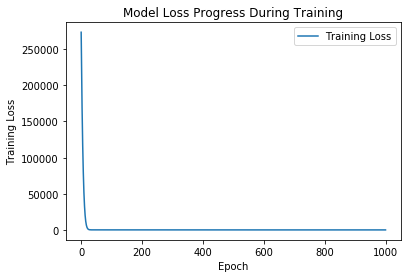

In [62]:
plt.plot(epoch_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [63]:
model.get_weights()

[array([[21.45911]], dtype=float32), array([44.608574], dtype=float32)]

In [64]:
# Use the trained model to perform predictions
Temp = 5
Revenue = model.predict([Temp])
print('Revenue Predictions using trained ANN=', Revenue)


Revenue Predictions using trained ANN= [[151.90411]]


Text(0.5, 1.0, 'Revenue Generated Vs. Temperature @Ice Cream Stand')

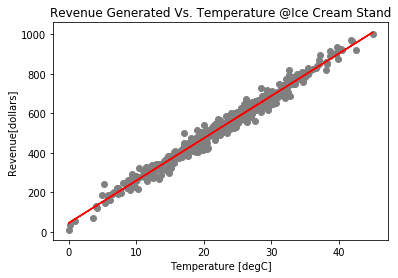

In [65]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, model.predict(X_train), color='red')
plt.ylabel('Revenue[dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated Vs. Temperature @Ice Cream Stand')


# STEP #6 (OPTIONAL): CONFIRM USING REGRESSION KIT IN SCIKIT LEARN!

In [0]:
X_train = X_train.values.reshape(-1,1)

In [48]:
X_train.shape

(500, 1)

In [0]:
y_train = y_train.values.reshape(-1,1)

In [50]:
y_train.shape

(500, 1)

In [53]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
print('Linear model coeff(m):', regressor.coef_)
print('Linear model coeff(b):', regressor.intercept_)

Linear model coeff(m): [[21.44362551]]
Linear model coeff(b): [44.83126709]


Text(0.5, 1.0, 'Revenue Generated Vs. Temperature @Ice Cream Stand')

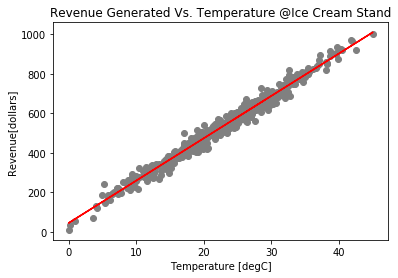

In [66]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.ylabel('Revenue[dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated Vs. Temperature @Ice Cream Stand')

# EXCELLENT JOB & CONGRATULATIONS! NOW YOU HAVE BUILT YOUR SECOND NEURAL NETWORK MODEL USING TENSORFLOW 2.0 IN GOOGLE COLAB! 